## Observations and Insights 

#### 1. Among all treatments, top 3 are Caponuli, Caftamin and Ramicane, considering they are with smaller and less varied average tumor size;
#### 2. The target treatment, Caponuli, is shown being effective on reducing tumor size over time. 
#### 3. There is a relatively strong relation between weight and tumor size.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
combined_df = pd.merge(study_results,mouse_metadata,on="Mouse ID",how="left")
# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


## Data Cleaning

In [2]:
# Checking the number of mice.
len(combined_df["Mouse ID"].unique())

249

In [3]:
# Checking how time was recorded over the course of 45 days
combined_df["Timepoint"].value_counts()

# It shows that maximum possible records for each unique mice is 10
# any mice with records over 10 likely being duplicated record
# getting the duplicate mice by ID number 
mice_time_df = combined_df.groupby("Mouse ID")[["Timepoint"]].count()
duplicate_ID = mice_time_df.loc[mice_time_df["Timepoint"]>10].index[0]

# show its records
combined_df.loc[combined_df["Mouse ID"] == duplicate_ID,:]

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_df = combined_df.loc[combined_df["Mouse ID"] != "g989",:]


In [5]:
# Checking the number of mice in the clean DataFrame.
len(cleaned_df["Mouse ID"].unique())

248

## Summary Statistics

#### Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

In [6]:
# Get the groupby onject for Regimen
# then apply different functions
# merge them into a summary table

drug_group = cleaned_df[["Drug Regimen","Tumor Volume (mm3)"]].groupby("Drug Regimen")
mean_df = drug_group.mean()
median_df = drug_group.median()
var_df = drug_group.var()
std_df = drug_group.std()
sem_df = drug_group.sem()

tem1 = mean_df.merge(median_df,left_index=True,right_index=True).rename(columns={"Tumor Volume (mm3)_x":"Mean","Tumor Volume (mm3)_y":"Median"})
tem2 = tem1.merge(var_df,left_index=True,right_index=True).rename(columns={"Tumor Volume (mm3)":"Variance"})
tem3 = tem2.merge(std_df,left_index=True,right_index=True).rename(columns={"Tumor Volume (mm3)":"STD"})
sum_df = tem3.merge(sem_df,left_index=True,right_index=True).rename(columns={"Tumor Volume (mm3)":"SEM"})

sum_df

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

#### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 



In [7]:
# get a dataframe containing unique Mouse ID 
unique_df = cleaned_df[["Mouse ID","Sex","Drug Regimen"]].drop_duplicates(subset=["Mouse ID"])
unique_df["Mouse ID"].count()

248

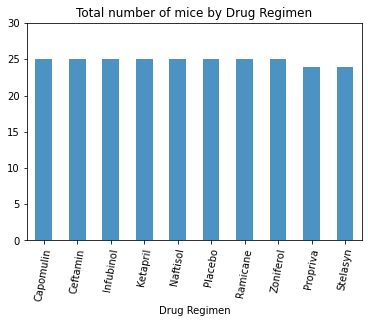

In [8]:
# Generate bar plot
bar_data = unique_df[["Mouse ID","Drug Regimen"]].groupby("Drug Regimen").count()
bar_data = bar_data.sort_values(by=["Mouse ID"],ascending=False)
bar_data.plot.bar(alpha=0.8,legend=None,title="Total number of mice by Drug Regimen")

# Customise the plot
plt.ylim(0,bar_data["Mouse ID"].max()+5)
plt.xticks(rotation=80)

plt.show()

#### Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.


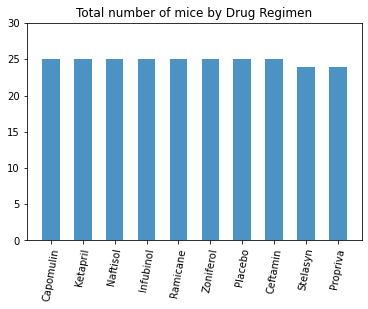

In [9]:
y_value = unique_df["Drug Regimen"].value_counts()
x_label = y_value.keys()

plt.bar(x_label,y_value,width=0.55,alpha=0.8)
plt.xticks(rotation=80)
plt.ylim(0,y_value.max()+5)
plt.title("Total number of mice by Drug Regimen")

plt.show()

#### Generate a pie plot showing the distribution of female versus male mice using pandas



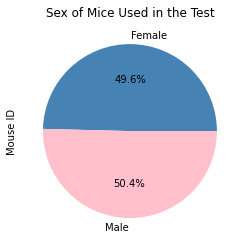

In [10]:
pie_data = unique_df[["Mouse ID","Sex"]].groupby("Sex").count()
pie_data.plot.pie(y="Mouse ID",autopct="%1.1f%%",colors=["steelblue","pink"],title="Sex of Mice Used in the Test",legend=None)

plt.show()

#### Generate a pie plot showing the distribution of female versus male mice using pyplot



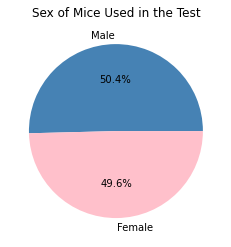

In [11]:
value = unique_df["Sex"].value_counts()
label = unique_df["Sex"].value_counts().keys()

plt.pie(value,labels=label,autopct="%1.1f%%",colors=["steelblue","pink"])
plt.title("Sex of Mice Used in the Test")

plt.show()

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
time_df = cleaned_df[["Timepoint","Mouse ID"]].groupby("Mouse ID")
time_final_df = time_df.max()
time_final_df.reset_index(inplace=True)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
final_tum_df = pd.merge(time_final_df,cleaned_df,how="inner",on=["Mouse ID","Timepoint"])
final_tum_df.shape

(248, 8)

In [13]:
top_regimen = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
top_final=[]

for regimen in top_regimen:
    # generate final tumor volumes for the top four regimes
    df=final_tum_df.loc[final_tum_df["Drug Regimen"]==regimen,["Tumor Volume (mm3)"]]
    top_final.append(df)
    
    # quantitatively test whether outliers
    iqr=df.quantile(0.75) - df.quantile(0.25) 
    lower_bound = df.quantile(0.25)-(1.5*iqr)
    upper_bound = df.quantile(0.75)+(1.5*iqr)
    out=df.loc[(df["Tumor Volume (mm3)"]<lower_bound[0])|(df["Tumor Volume (mm3)"]> upper_bound[0])] 
    print(f"{regimen} has {out.shape[0]} outliers")

Capomulin has 0 outliers
Ramicane has 0 outliers
Infubinol has 1 outliers
Ceftamin has 0 outliers


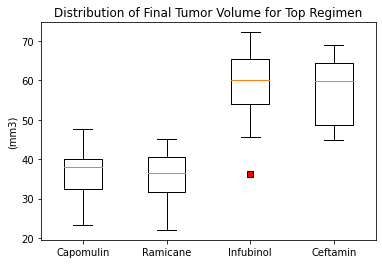

In [14]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
import numpy as np

red_square = dict(markerfacecolor='r', marker='s')
data = [top_final[i]["Tumor Volume (mm3)"] for i in range(len(top_regimen))]
plt.boxplot(data, flierprops=red_square)
plt.xticks(np.arange(1,5,1),top_regimen)
plt.title("Distribution of Final Tumor Volume for Top Regimen")
plt.ylabel("(mm3)")
plt.show()

## Line and Scatter Plots

#### Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

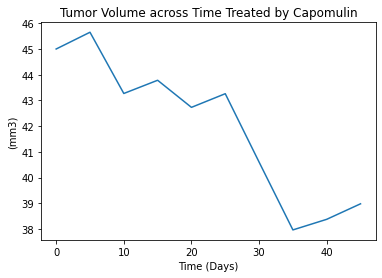

In [15]:
# Choose a mouse satisfying the requirement
cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]["Mouse ID"].value_counts()

# b128 is chosen
chosen_df = cleaned_df.loc[cleaned_df["Mouse ID"]=="b128"]
plt.plot(chosen_df["Timepoint"],chosen_df["Tumor Volume (mm3)"])
plt.title("Tumor Volume across Time Treated by Capomulin")
plt.xlabel("Time (Days)")
plt.ylabel("(mm3)")
plt.show()

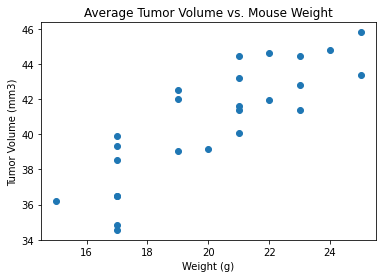

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
cap_df = cleaned_df.loc[cleaned_df["Drug Regimen"]=="Capomulin"]
weight_group = cap_df[["Mouse ID","Tumor Volume (mm3)","Weight (g)"]].groupby("Mouse ID")
scatter_data = weight_group.mean()

plt.scatter(scatter_data["Weight (g)"],scatter_data["Tumor Volume (mm3)"])
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

Correlation Coefficient between mice weight and Average Tumor Volume are 0.8419363424694721


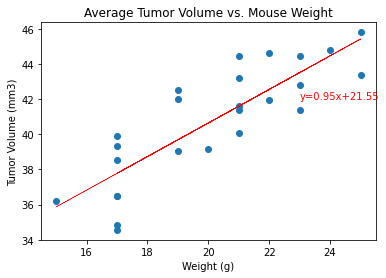

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

(slo,inter,r,p,std) = st.linregress(scatter_data["Weight (g)"],scatter_data["Tumor Volume (mm3)"])
print(f"Correlation Coefficient between mice weight and Average Tumor Volume are {r}")

regress_value = scatter_data["Weight (g)"] * slo + inter
plt.plot(scatter_data["Weight (g)"],regress_value,"r-",linewidth=0.5)
plt.scatter(scatter_data["Weight (g)"],scatter_data["Tumor Volume (mm3)"])

line_eq = "y=" + str(round(slo,2)) + "x" + "+" +str(round(inter,2))
plt.annotate(line_eq,(23,42),fontsize=10,color="red")

plt.title("Average Tumor Volume vs. Mouse Weight")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()

